# Improving a model

In [3]:
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from io import StringIO #used to convert string to a dataframe
from scipy.optimize import curve_fit #used to find the fit parameters

## Exponential growth and epidemics

Watch the following video by Grant Sanderson of [3blue1brown](https://www.3blue1brown.com/).

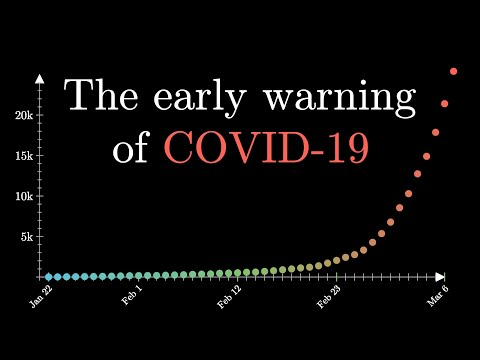

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Kas0tIxDvrg')

## Example - An emperical model for HPU COVID data

First, we will fit an exponential model to the COVID data using

$$y = Ae^{rx}$$


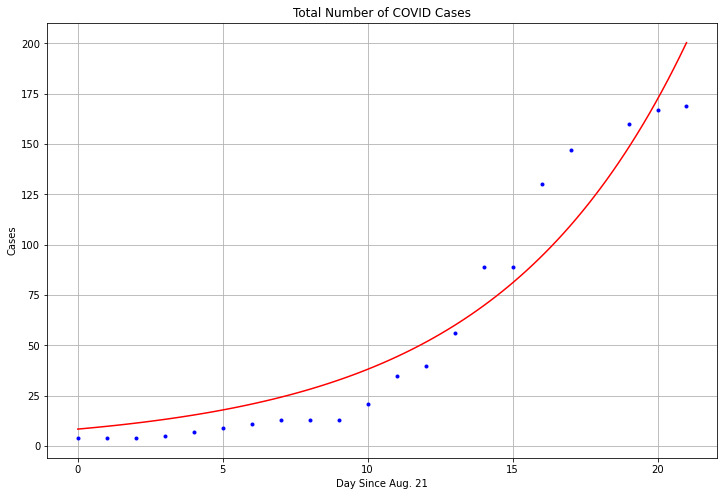

The curve fit parameters are:  8.43996232928684 0.1508044065709369


In [24]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata = df['x']
ydata = df['y']

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,21,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
print("The curve fit parameters are: ",*params)


Notice that the exponential fit is lousy. It may have for the first 15 days, but it does not fit the last 6 days.

There are two things to consider:

1. fit the exponential to a subset of the data for which it applies.
2. find a new function that fits the data better than the exponential.

## Fitting a curve to a subset of data

Suppose we have a set of data stored in arrays `xdata_all` and `ydata_all`. (These are all of the independent and dependent variables of our data set from the dataframe.) If we only want a portion of this data (for the purpose of a curve fit or graph or something), then we can reference that portion using the syntax:

```python
xdata = xdata_all[0:10]
ydata = ydata_all[0:10]
```

where the 0 represents the first data point in your subset and the 10 is the eleventh data point in your subset. 

If you want data between the eleventh value and the twenty-first value, for example, then you would use:

```python
xdata = xdata_all[10:20]
ydata = ydata_all[10:20]
```


In the following program, we plot only the first 14 data points in the set. So we use:

```python
xdata = xdata_all[0:13]
ydata = ydata_all[0:13]
```

For the graph, we plot all of the data in blue, and we plot the subset of data used for the curve fit in magenta.

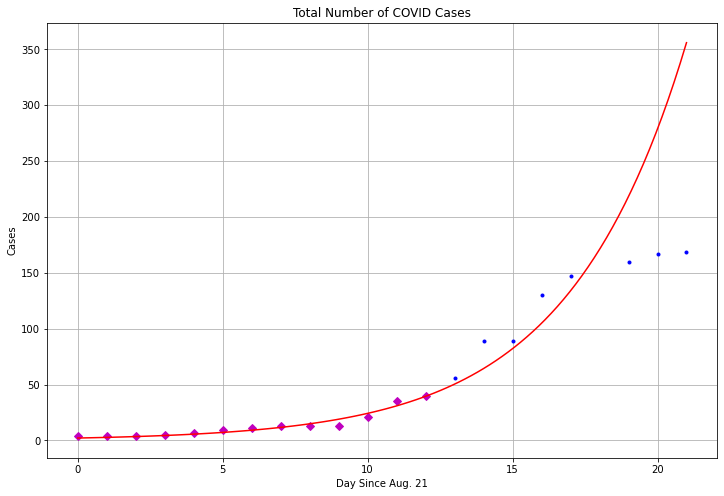

The curve fit parameters are:  2.0982705610988885 0.24445430172763158


In [25]:
#define data
#The columns are: Day	Total Cases
data = StringIO("""x	y
0	4
1	4
2	4
3	5
4	7
5	9
6	11
7	13
8	13
9	13
10	21
11	35
12	40
13	56
14	89
15	89
16	130
17	147
19	160
20	167
21	169
""")

# convert data to dataframe
df = pd.read_csv(data, sep ="\t")

# define arrays for the data
xdata_all = df['x']
ydata_all = df['y']

# select a subset of the data
xdata = xdata_all[0:13]
ydata = ydata_all[0:13]

# define the model function; this function returns y(x) for a given x and fit parameters
model = lambda x,A,r: A*np.exp(r*x)

# Find best fit parameters
guess=[1,1] # this is the initial guess for the fit parameters
params, covariance = curve_fit(model, xdata, ydata, p0=guess)

# calculate points for the model
xmodel = np.linspace(0,21,100)
ymodel = model(xmodel,*params)

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot data and model
plt.plot(xdata_all,ydata_all,'b.') # all data
plt.plot(xdata,ydata,'mD') # subset of data for curve fit
plt.plot(xmodel,ymodel,'r-') # best fit model
plt.grid()
plt.title("Total Number of COVID Cases")
plt.ylabel("Cases")
plt.xlabel("Day Since Aug. 21")
plt.show()

#results
print("The curve fit parameters are: ",*params)


### Exercise

Fit an exponential to the subset of data between day 5 and day 15.

## Logistic model

A logistic function has the form:

$$y = \frac{L}{1+e^{-k(x-x_0)}}$$

where $L$, $k$, and $x_0$ are fit parameters.

### Exercise - Get a feel for the parameters

Plot the function using the code below. Figure out how changing each of these fit parameters changes the overall shape of the function. **Note: you will have to type the equation for `y` in the code.** At first, the code only plots $y=x$.

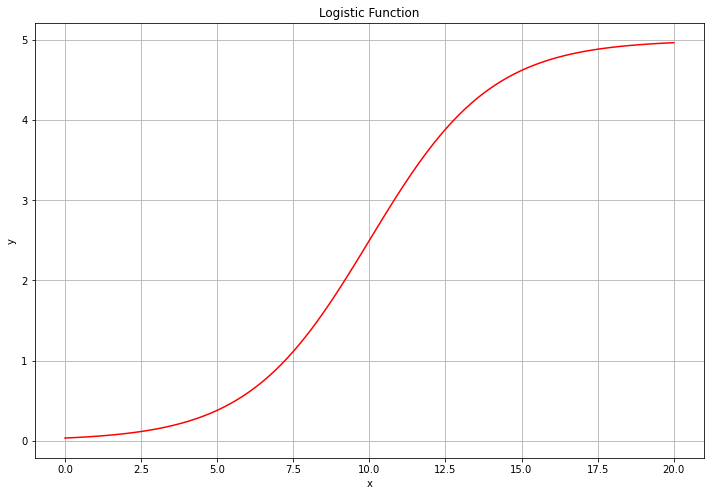

In [19]:
L = 5
k = 0.5
x_0 = 10
x = np.linspace(0,20,100)
y = L/(1+np.exp(-k*(x-x_0)))

# create graph
fig1 = plt.figure(figsize=(12,8))

# plot
plt.plot(x,y,'r-')
plt.grid()
plt.title("Logistic Function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()


### Exercise - Describe the function

What are the features of this function that make you think it might fit our HPU COVID-19 case data?

### Exercise - Fit a logistic to the HPU COVID data

Fit the logistic function to the data set (all of the data, from Day 0 to Day 21) and find the best-fit parameters.

## Use your model to make a prediction

Answer the following questions.

1. According to your model, how many cases can we expect on Day 28?
2. What do you predict will be the maximum number of COVID-19 cases at HPU?
